In [54]:
import numpy as np
import scipy.special as ss
import scipy.optimize as optimize 

%matplotlib inline
import matplotlib.pyplot as plt

#import pyscattering  as scatter

In [55]:
ss.genlaguerre(0, 1/2)

poly1d([1.])

In [56]:
ss.assoc_laguerre(0.,0, 1/2)

1.0

In [57]:
nmax = 100
Nr = 101

k0=100
R=.05

rmax = 1.1*R
rr, dr = np.linspace(0,rmax,Nr,endpoint=True, retstep=True)
r2 = rr**2

# s-wave

In [58]:
def φn(r2, n):
    return 2*np.exp(-r2/2)*ss.assoc_laguerre(r2,n,1/2) / ( np.pi**.25*np.sqrt(ss.assoc_laguerre(0,n,1/2)) )

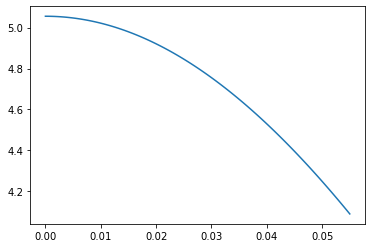

In [59]:
plt.plot(rr,φn(r2, nmax))

In [60]:
# orthogonality
n=4
np.sum(np.abs(φn(r2,n))**2*r2)*dr

0.00030902719782732805

In [61]:
# 3d well

def Vint(r,R,k0):
    return -k0**2*np.heaviside(R-r,0.5)
    #β=100/R
    #return -k0**2*(1+np.tanh(β*(R-r))) 

In [62]:
rr[:20]

array([0.     , 0.00055, 0.0011 , 0.00165, 0.0022 , 0.00275, 0.0033 ,
       0.00385, 0.0044 , 0.00495, 0.0055 , 0.00605, 0.0066 , 0.00715,
       0.0077 , 0.00825, 0.0088 , 0.00935, 0.0099 , 0.01045])

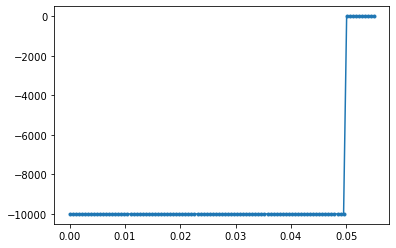

In [63]:
plt.plot(rr,Vint(rr,R,k0),'.-')

In [64]:
def get_Hrel(nmax,R,k0):

    Hrel = np.zeros([nmax,nmax])

    for n in range(nmax):
        Hrel[n,n] = 2*n+1.5 + np.sum(φn(r2,n)*φn(r2,n)*Vint(rr,R,k0)*r2)*dr

    for n in range(nmax):
        for m in range(n+1,nmax):
            Hrel[n,m] = np.sum(φn(r2,n)*φn(r2,m)*Vint(rr,R,k0)*r2)*dr
            Hrel[m,n] = Hrel[n,m]
    return Hrel

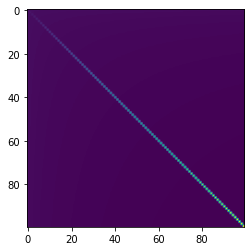

In [65]:
Hrel = get_Hrel(nmax,R,k0)
plt.imshow(Hrel)

In [66]:
Hrel[0,0]

0.573727234253889

In [67]:
φn(0,0)/np.sqrt(4*np.pi)

0.42377720812375763

In [68]:
np.sum(φn(r2,0)*φn(r2,0)*Vint(rr,R,k0)*r2)*dr

-0.926272765746111

In [69]:
ee, uu = np.linalg.eigh(Hrel)

In [70]:
ee[:4]

array([-509.33240161,    1.60839025,    3.66107196,    5.70061081])

In [71]:
def get_a0(R,k0):
    #k0R=np.sqrt(V0)*R
    k0R=k0*R
    return R*(1-np.tan(k0R)/k0R)

In [72]:
#scatter.a_s_W(k0*R)*R

In [73]:
get_a0(R,k0)

0.08380515006246586

In [74]:
#scatter.r_0_W(k0*R)*R

In [75]:
k0 = optimize.fsolve(lambda k0: get_a0(R,k0)-1, np.pi/(2*R/1.1))[0]

In [77]:
#scatter.a_s_W(k0*R)*R

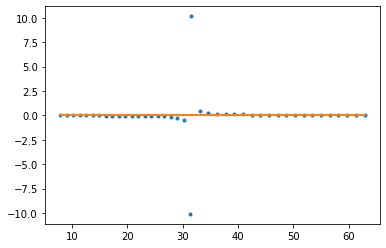

In [78]:
k0star=np.pi/(2*R)
Na0 = 21
k0list = np.linspace(k0star*1.002,k0star*2,Na0)
k0list = np.array ([*k0list, *np.linspace(k0star/4,k0star*.998,Na0)])
a0list = get_a0(R,k0list)

plt.plot(k0list,a0list,'.')
plt.plot(k0list,0*a0list)

In [79]:
%%time
res = []
for k0 in k0list:
    Hrel = get_Hrel(nmax,R,k0)
    ee, uu = np.linalg.eigh(Hrel)
    res.append(ee)
    
all_eigs = np.array(res)

CPU times: user 32.3 s, sys: 6.43 s, total: 38.7 s
Wall time: 26.6 s


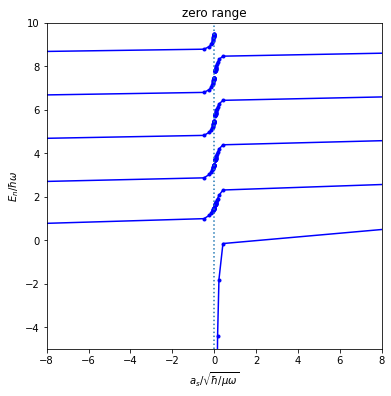

In [83]:
plt.figure(figsize=(6,6))
isplit = len(a0list)//2
for i in range(5):
    plt.plot(a0list[:isplit],all_eigs[:isplit,i],'b.-');
    plt.plot(a0list[isplit:],all_eigs[isplit:,i],'b.-');
    
#plt.plot(a0list,scatter.r_0_W(k0list*R)*R,'r--', label=r"$r_0$");

plt.xlim([-8,8])
plt.ylim([-5,10])
plt.xlabel(r"$a_s/\sqrt{\hbar/\mu\omega}$")
plt.ylabel(r"$E_n/\hbar\omega$")
plt.title("zero range")
plt.axvline(0,ls=':');
#plt.legend(loc=4);